Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


476/476 ━━━━━━━━━━━━━━━━━━━━ 368s 769ms/step - accuracy: 0.9692 - loss: 0.1538 - val_accuracy: 0.9688 - val_loss: 0.1391
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 374s 752ms/step - accuracy: 0.9672 - loss: 0.1449 - val_accuracy: 0.9688 - val_loss: 0.1388
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 380s 748ms/step - accuracy: 0.9704 - loss: 0.1336 - val_accuracy: 0.9688 - val_loss: 0.1391
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 401s 788ms/step - accuracy: 0.9679 - loss: 0.1422 - val_accuracy: 0.9688 - val_loss: 0.1390
Epoch 5/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 367s 757ms/step - accuracy: 0.9680 - loss: 0.1422 - val_accuracy: 0.9688 - val_loss: 0.1393
Epoch 6/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 377s 747ms/step - accuracy: 0.9698 - loss: 0.1361 - val_accuracy: 0.9688 - val_loss: 0.1388
Epoch 7/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 386s 755ms/step - accuracy: 0.9699 - loss: 0.1352 - val_accuracy: 0.9688 - val_loss: 0.1392
Epoch 8/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 383s 758ms/step - accuracy: 0.9688 - loss: 0.13

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test set accuracy: 0.9688485804416404
Test set F1 score (weighted): 0.9535193118946969
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7371
           1       0.00      0.00      0.00       237

    accuracy                           0.97      7608
   macro avg       0.48      0.50      0.49      7608
weighted avg       0.94      0.97      0.95      7608

Confusion Matrix:
 [[7371    0]
 [ 237    0]]


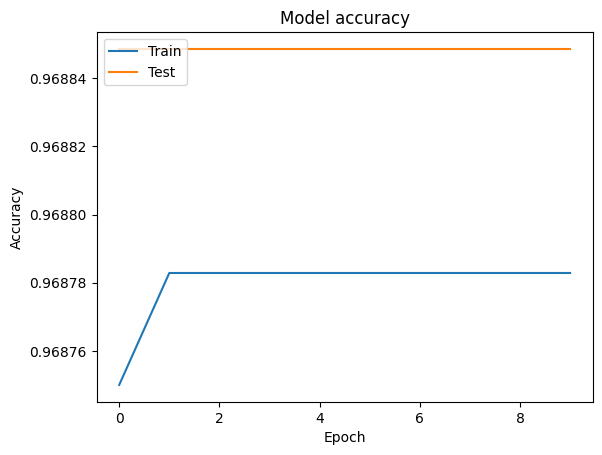

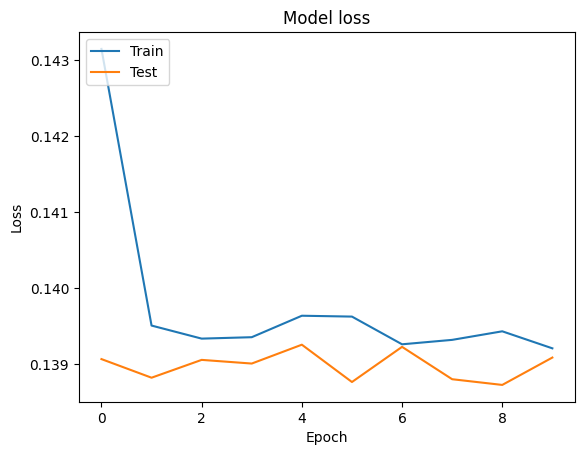

In [2]:
# Install necessary libraries
!pip install tensorflow rdkit-pypi

# Importing necessary libraries
import pandas as pd
from rdkit import Chem
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'hiv.csv'  # Provide the correct path in your Colab environment
df = pd.read_csv(file_path)

# Tokenizer for SMILES strings (character-level tokenization)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['smiles'])

# Convert SMILES to sequences of tokens
sequences = tokenizer.texts_to_sequences(df['smiles'])

# Define a maximum sequence length (based on the typical length of SMILES strings)
max_len = max([len(seq) for seq in sequences])

# Pad the sequences to ensure all SMILES strings have the same length
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare the labels (y)
y = df['label']

# Convert labels to categorical (for neural networks)
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size based on the tokenizer

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))  # Embedding layer
model.add(LSTM(100, return_sequences=False))  # LSTM layer with 100 units
model.add(Dense(2, activation='softmax'))  # Output layer (2 classes: 0 or 1)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

# Calculate performance metrics
accuracy = accuracy_score(y_test_labels, y_pred)
f1 = f1_score(y_test_labels, y_pred, average='weighted')
classification_rep = classification_report(y_test_labels, y_pred)
confusion_mat = confusion_matrix(y_test_labels, y_pred)

# Output the results
print(f"Test set accuracy: {accuracy}")
print(f"Test set F1 score (weighted): {f1}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

# You can also plot the training history (optional) to visualize training and validation performance
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
